#EXPLORATORY DATA ANALYSIS




In [ ]:
#Loading data into the data frame from yahoo finance
#importing the neccessary library
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import yfinance as yf
import time
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
tickers_list = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'LTC-USD', 'BCH-USD', 'BNB-USD', 
                'LINK-USD', 'ADA-USD', 'XLM-USD', 'DOGE-USD', 'DOT1-USD', 'UNI3-USD', 'THETA-USD', 
                'VET-USD', 'EOS-USD', 'TRX-USD', 'ATOM1-USD', 'BSV-USD', 'XMR-USD', 'IOTX-USD']
ticker = input("Enter a preferred crypto ticker from the tickers_list: ").upper()
while ticker not in tickers_list:
    ticker = input("Invalid ticker! Enter a preferred crypto ticker from the list: ").upper()
df = yf.download(tickers=ticker, period="max", interval="1d", group_by='ticker')
# df = yf.download(tickers_list, start= '2018-01-01', end= '2023-05-05', interval="1wk", group_by='tickers')
print(df.head())

Enter a preferred crypto ticker from the tickers_list: BTC-USD
[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2014-09-17  465.864014  468.174011  452.421997  457.334015  457.334015   
2014-09-18  456.859985  456.859985  413.104004  424.440002  424.440002   
2014-09-19  424.102997  427.834991  384.532013  394.795990  394.795990   
2014-09-20  394.673004  423.295990  389.882996  408.903992  408.903992   
2014-09-21  408.084991  412.425995  393.181000  398.821014  398.821014   

              Volume  
Date                  
2014-09-17  21056800  
2014-09-18  34483200  
2014-09-19  37919700  
2014-09-20  36863600  
2014-09-21  26580100  


#Line Plots Showing Bitcoin trend with other Coins 

[*********************100%***********************]  5 of 5 completed


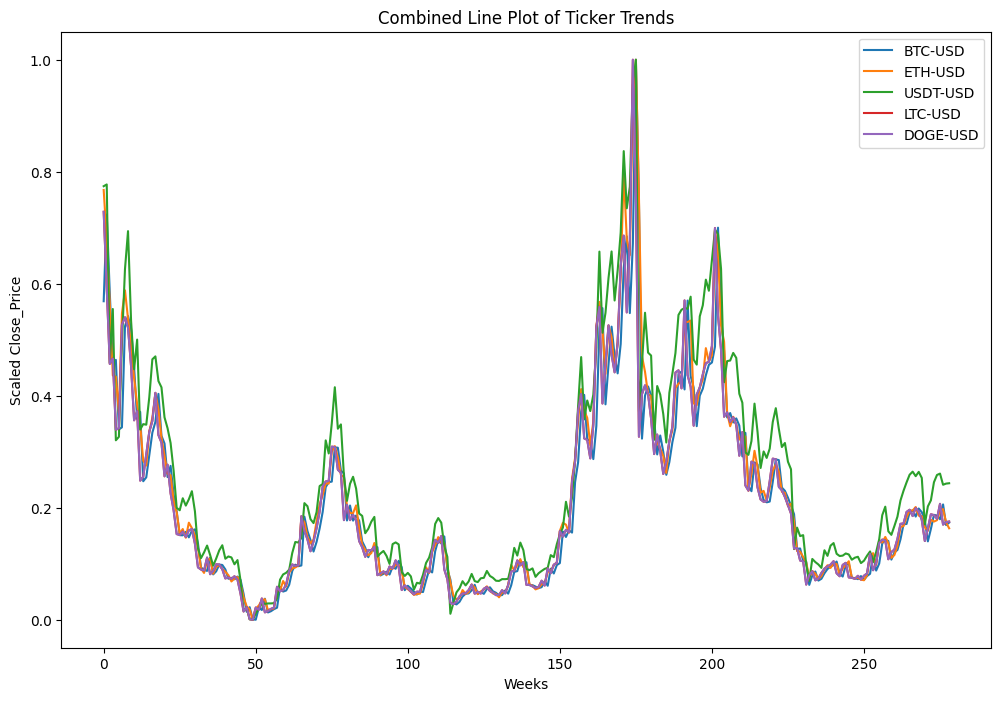

In [ ]:
# Define the tickers list
tickers_list = ['BTC-USD','ETH-USD','USDT-USD', 'LTC-USD', 'DOGE-USD']

# Download the data
df = yf.download(tickers_list, start='2018-01-01', end='2023-05-05', interval='1wk', group_by='tickers')
# print(df.head())

# Clean and preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
# df = df['Close'].dropna()

# Create a combined line plot
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(tickers_list)):
    ax.plot(scaled_data[:, i], label=tickers_list[i])

ax.set_title('Combined Line Plot of Ticker Trends')
ax.set_xlabel('Weeks')
ax.set_ylabel('Scaled Close_Price')
ax.legend()
plt.show()


[*********************100%***********************]  6 of 6 completed

1 Failed download:
- DOT1-USD: No data found for this date range, symbol may be delisted


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:473: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_data.py:474: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


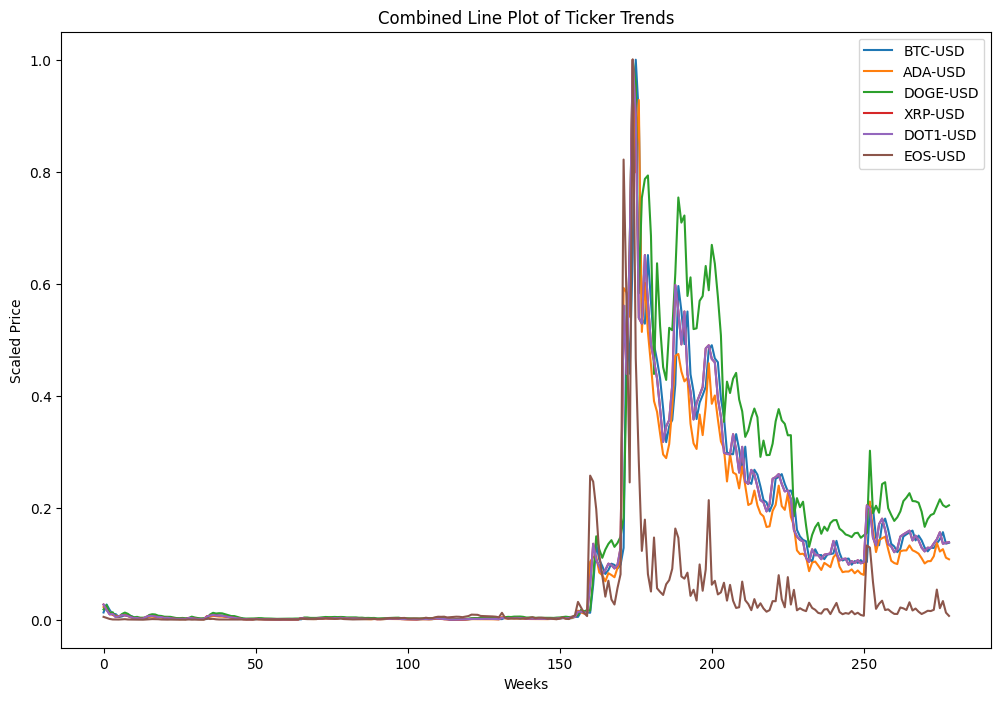

In [ ]:

#Define the tickers list
tickers_list = ['BTC-USD', 'ADA-USD', 'DOGE-USD', 'XRP-USD', 'DOT1-USD','EOS-USD']

# Download the data
df = yf.download(tickers_list, start='2018-01-01', end='2023-05-05', interval='1wk', group_by='tickers')
# print(df.head())

# Clean and preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
# df = df['Close'].dropna()

# Create a combined line plot
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(tickers_list)):
    ax.plot(scaled_data[:, i], label=tickers_list[i])

ax.set_title('Combined Line Plot of Ticker Trends')
ax.set_xlabel('Weeks')
ax.set_ylabel('Scaled Price')
ax.legend()
plt.show()

[*********************100%***********************]  5 of 5 completed


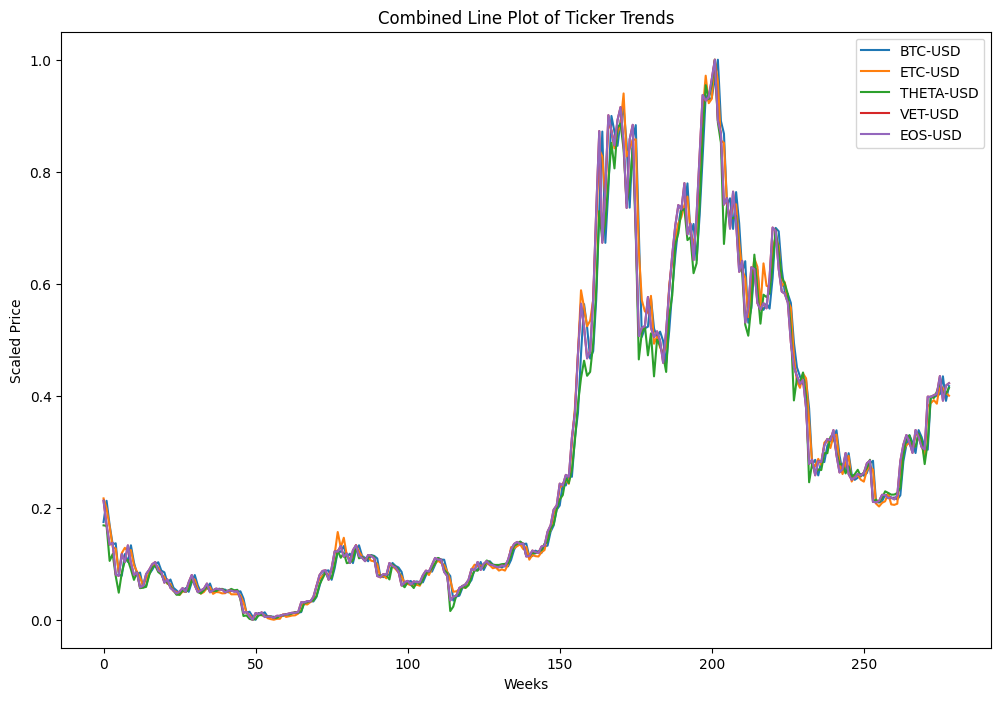

In [ ]:
# Define the tickers list
tickers_list = ['BTC-USD', 'ETC-USD', 'THETA-USD', 'VET-USD', 'EOS-USD']

# Download the data
df = yf.download(tickers_list, start='2018-01-01', end='2023-05-05', interval='1wk', group_by='tickers')
# print(df.head())

# Clean and preprocess the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
# df = df['Close'].dropna()

# Create a combined line plot
fig, ax = plt.subplots(figsize=(12, 8))
for i in range(len(tickers_list)):
    ax.plot(scaled_data[:, i], label=tickers_list[i])

ax.set_title('Combined Line Plot of Ticker Trends')
ax.set_xlabel('Weeks')
ax.set_ylabel('Scaled Price')
ax.legend()
plt.show()

##FEATURE SELECTION

[*********************100%***********************]  1 of 1 completed


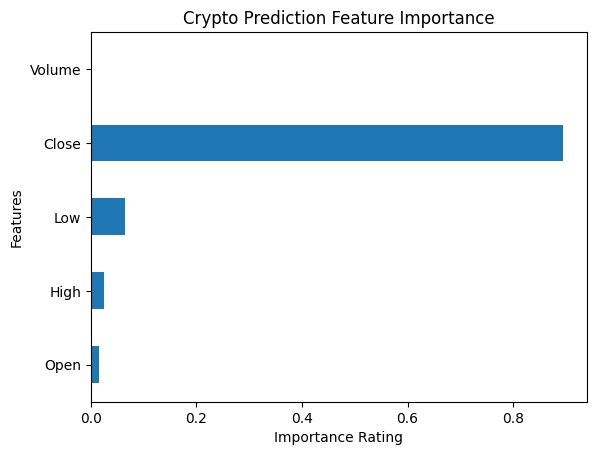

Feature Importance Ranking:
 Close     0.894719
Low       0.064186
High      0.024965
Open      0.016128
Volume    0.000003
dtype: float64


In [ ]:
# a list containing tickers for different cryptocurrencies
tickers_list = ['BTC-USD']

# Data Collection
# download the data using yfinance library for required crypto tickers
df = yf.download(tickers_list, period="max", interval="1d", group_by='tickers')

# Define features and target variable
features = df[['Open', 'High', 'Low', 'Close', 'Volume']]
target = 'Close'

# Fit random forest regression model
rf = RandomForestRegressor()
rf.fit(features, df[target])

# Plot feature importance
importances = pd.Series(rf.feature_importances_, index=features.columns)
importances.plot(kind='barh')
plt.xlabel('Importance Rating')
plt.ylabel('Features')
plt.title('Crypto Prediction Feature Importance')
plt.show()

# Print feature importance ranking
feature_ranking = importances.sort_values(ascending=False)
print('Feature Importance Ranking:\n', feature_ranking)


In [ ]:
#Extracting the 'Close' colunm from the dataframe
df2 = df.iloc[:, [3]]
print(df2.head())

              Close
Date               
2017-11-09  1.99077
2017-11-10  1.79684
2017-11-11  1.67047
2017-11-12  1.51969
2017-11-13  1.68662


In [ ]:
df2 = df.iloc[:, [3]].reset_index()
print(df2.head())

        Date    Close
0 2017-11-09  1.99077
1 2017-11-10  1.79684
2 2017-11-11  1.67047
3 2017-11-12  1.51969
4 2017-11-13  1.68662


In [ ]:
#Checking the data types and null value
print(df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3158 entries, 2014-09-17 to 2023-05-10
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3158 non-null   float64
 1   High       3158 non-null   float64
 2   Low        3158 non-null   float64
 3   Close      3158 non-null   float64
 4   Adj Close  3158 non-null   float64
 5   Volume     3158 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 172.7 KB
None


In [ ]:
#Check for missing value
print(df.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


#STATISTICAL SUMMARY

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,3158.000000,3158.000000,3158.000000,3158.000000,3158.000000,3.158000e+03
mean,67.854717,70.466865,65.016712,67.860438,67.860438,1.451175e+09
std,66.277446,69.554107,62.648512,66.233482,66.233482,2.168210e+09
min,1.153240,1.344810,1.113740,1.157010,1.157010,4.817140e+05
25%,4.076277,4.162795,3.980250,4.074552,4.074552,5.735102e+06
50%,54.308464,55.885889,52.714951,54.321356,54.321356,4.964676e+08
75%,95.576118,98.615171,92.600737,95.543537,95.543537,2.260771e+09
max,387.869171,412.960144,345.298828,386.450775,386.450775,1.799426e+10


UNIVARIATE ANALYSIS

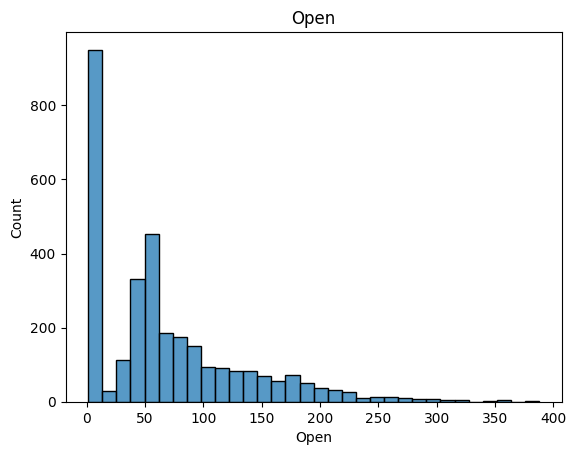

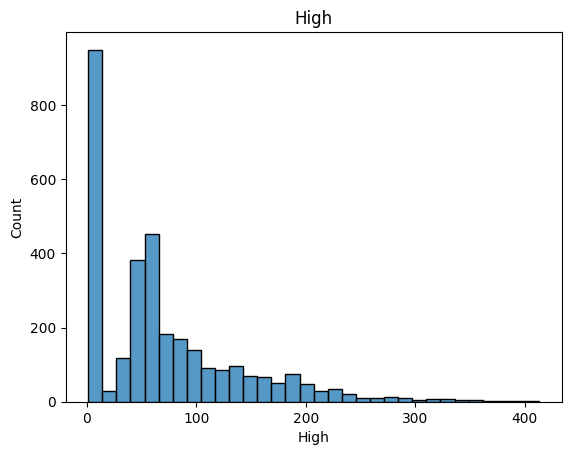

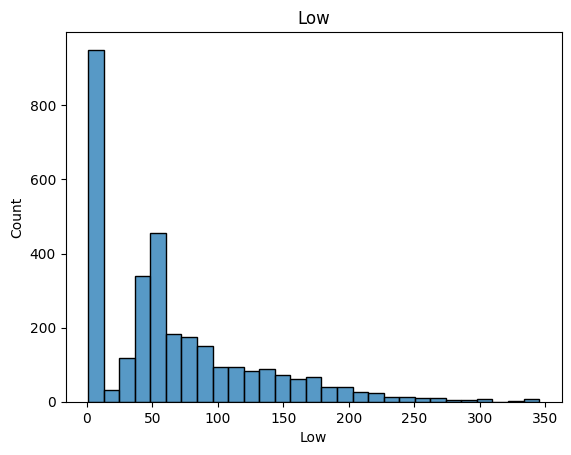

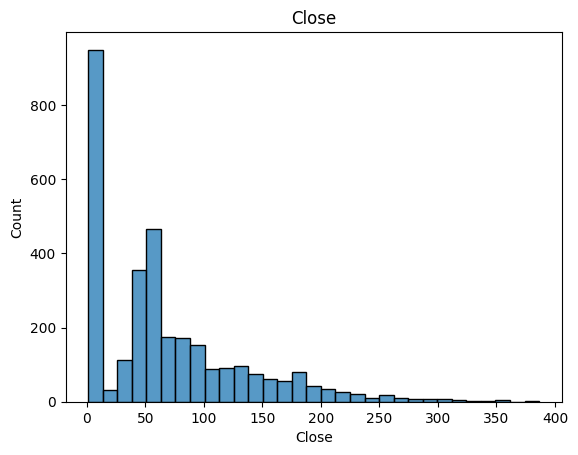

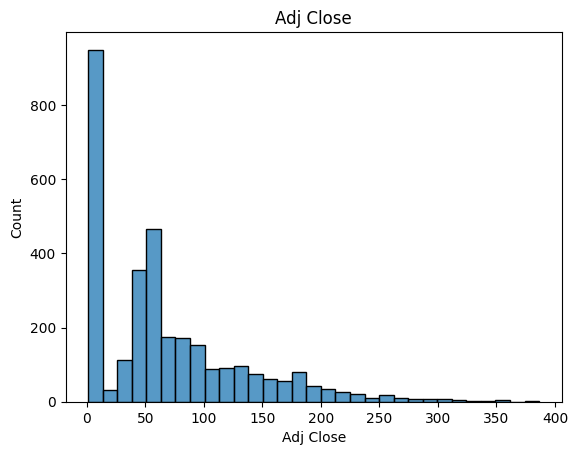

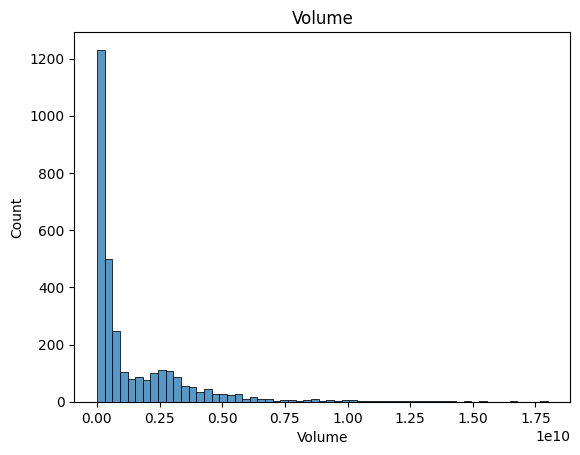

In [ ]:
# Visualize the distribution of each column
for column in df.columns:
    sns.histplot(df[column])
    plt.title(column)
    plt.show()

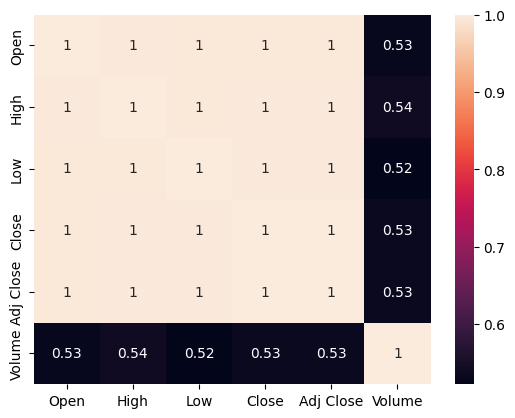

In [ ]:
# Checking the correlation between the features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

<ipython-input-17-671fe3af8d6d>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Close"], shade=True)


<Axes: xlabel='Close', ylabel='Density'>

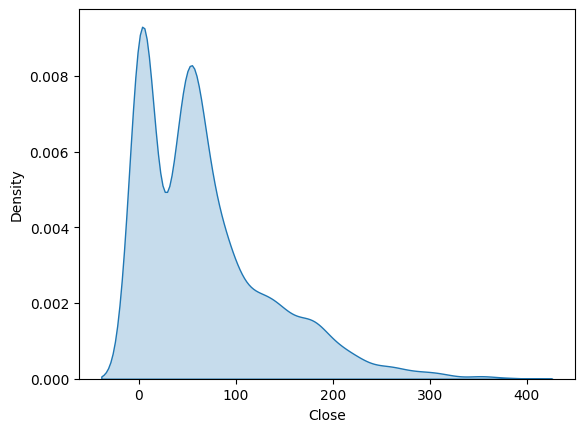

In [ ]:
# Create a density plot using seaborn
sns.kdeplot(df["Close"], shade=True)

<ipython-input-18-5778c9644a96>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df["Low"], shade=True)


<Axes: xlabel='Low', ylabel='Density'>

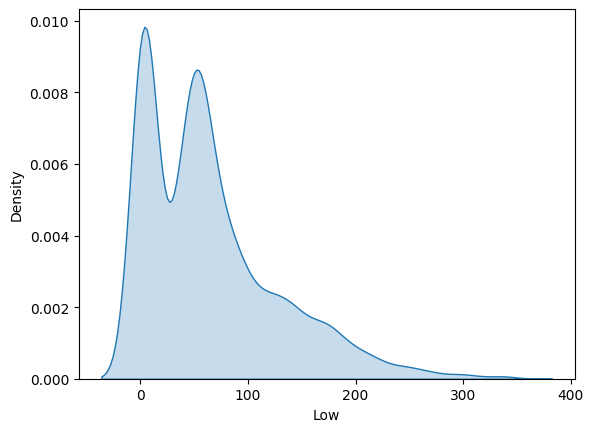

In [ ]:
sns.kdeplot(df["Low"], shade=True)

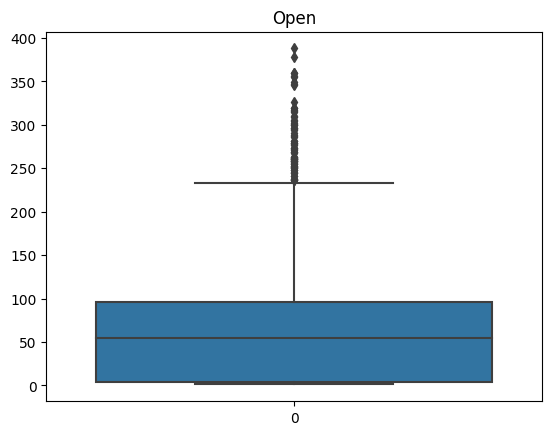

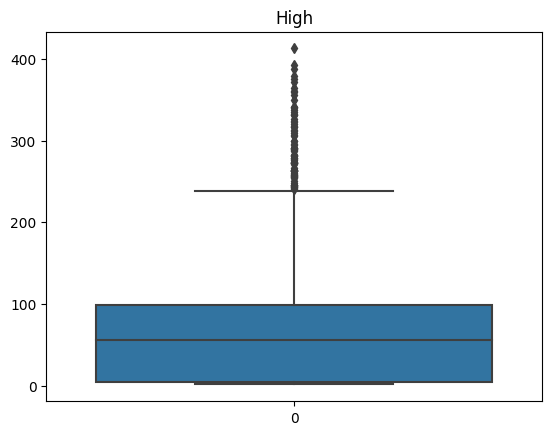

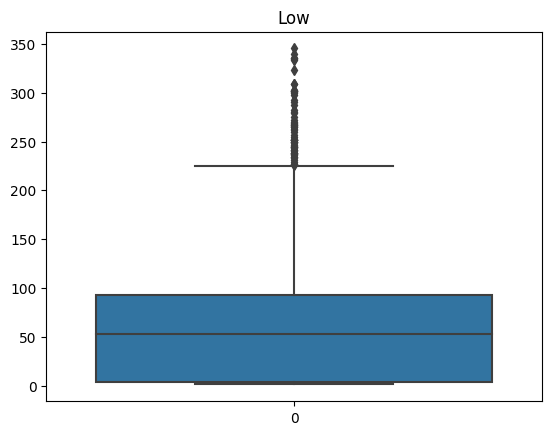

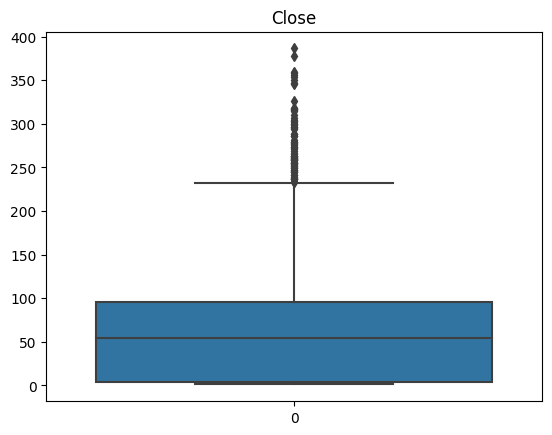

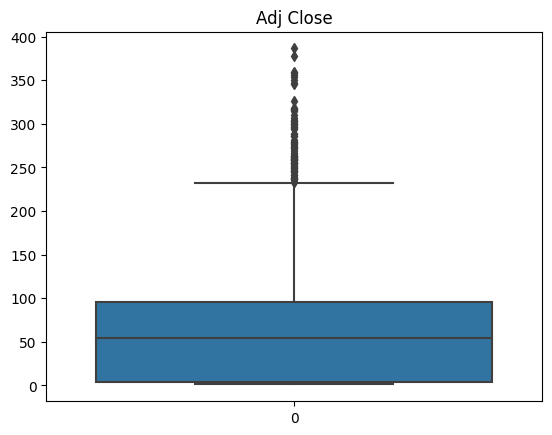

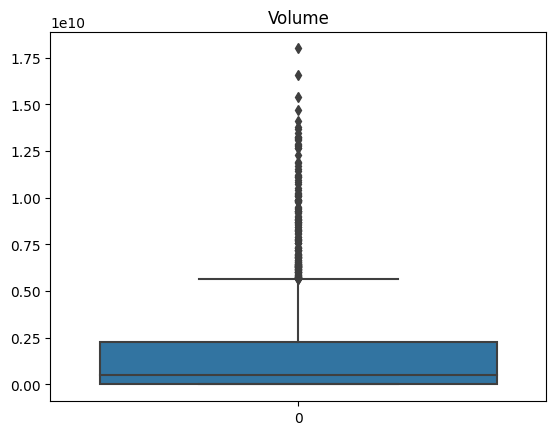

In [ ]:
# Checking for outliers in the data
for column in df.columns:
    sns.boxplot(df[column])
    plt.title(column)
    plt.show()

array([[<Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>],
       [<Axes: title={'center': 'Adj Close'}>,
        <Axes: title={'center': 'Volume'}>]], dtype=object)

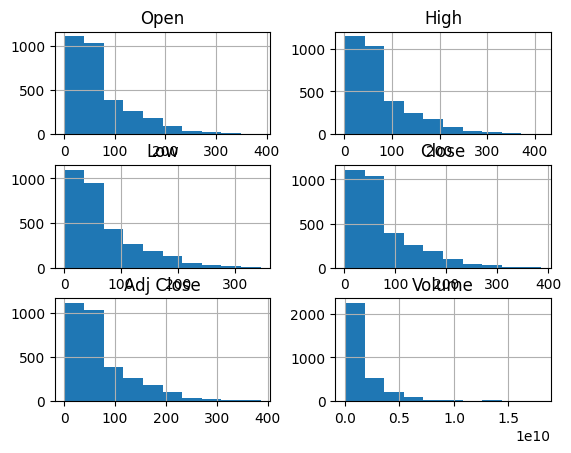

In [ ]:
# Compute and plot autocorrelation
df.hist()

#MULTI-VARIATE ANALYSIS

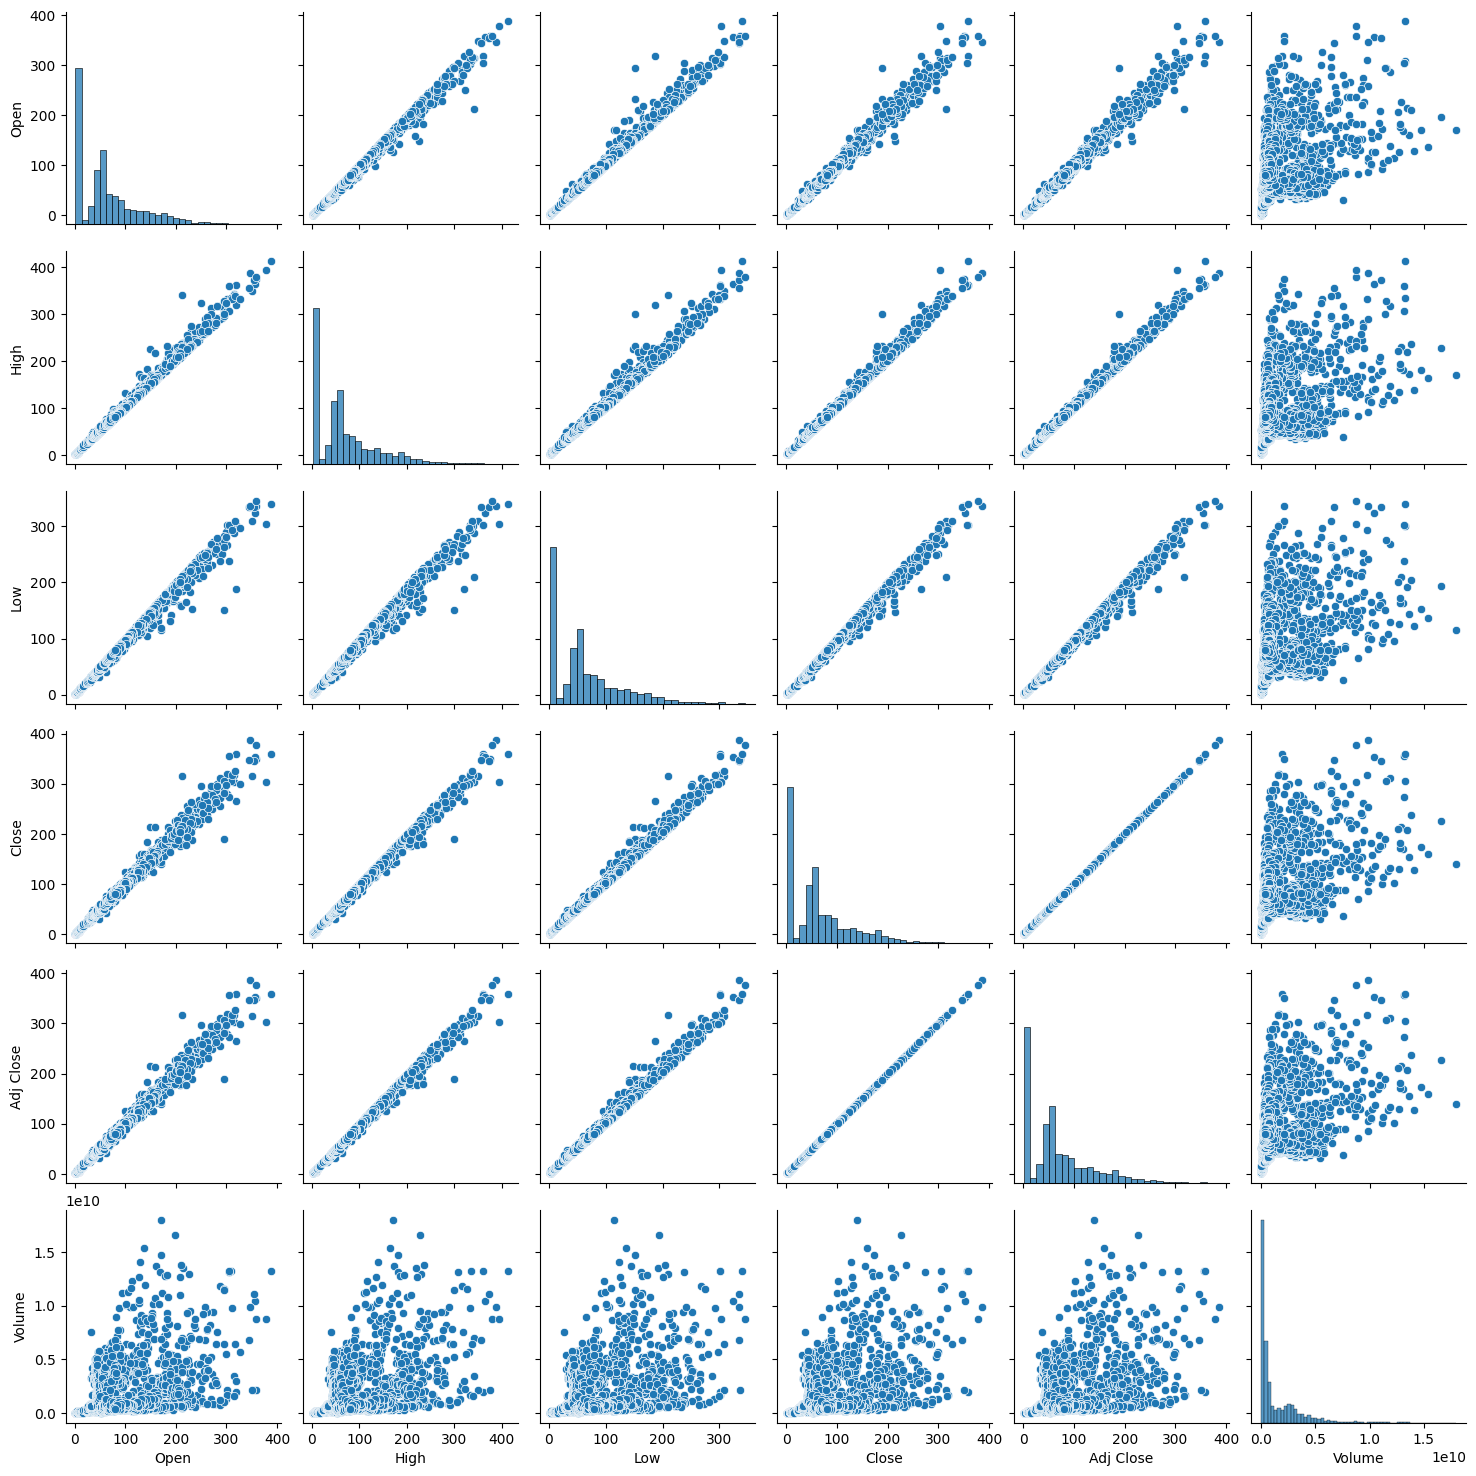

In [ ]:
# Check the pairwise relationship between the features using pairplots
sns.pairplot(df)
plt.show()

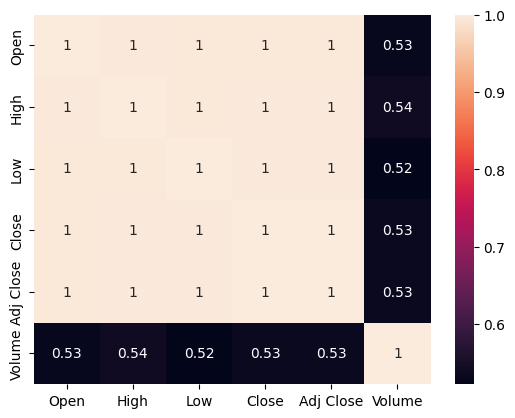

In [ ]:
# Checking the correlation between the features
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [ ]:
#Downloading Bitcoin data from yfinance into
# a list containing tickers for different cryptocurrencies
tickers_list = ['BTC-USD']
# download the data using yfinance library for required crypto tickers
df = yf.download(tickers_list, start= '2018-01-01', end= '2023-05-05', interval="1wk", group_by='tickers')
df.tail()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-04-03,28183.080078,28739.238281,27276.720703,28333.050781,28333.050781,98141424556
2023-04-10,28336.027344,31005.607422,28189.271484,30315.355469,30315.355469,122998807738
2023-04-17,30317.146484,30470.302734,27169.570312,27591.384766,27591.384766,129935327803
2023-04-24,27591.730469,29995.837891,27070.849609,29268.806641,29268.806641,137303647007
2023-05-01,29227.103516,29668.908203,27680.792969,29534.384766,29534.384766,87696742053


In [ ]:

# create a new dataframe for Random Forest Regressor specific input
data_train = pd.DataFrame()

# lst = []
# for i in tickers_list:
data_train['date'] = df.reset_index()['Date']
data_train['close'] = df.reset_index()['Close']
  # lst.append(data_train['close'])

# remove null values from the dataset
data_train.dropna(inplace=True)

# Scaling the 'Close' column using MinMaxScaler
scaler = MinMaxScaler()
data_train[['close']] = scaler.fit_transform(data_train[['close']])
data_train.tail()

,date,close
274,2023-04-03,0.403128
275,2023-04-10,0.434991
276,2023-04-17,0.391207
277,2023-04-24,0.418169
278,2023-05-01,0.422438


##First Experiment

In [ ]:
#Random Forest - Sliding window
def random_forest_sliding_window(data_train):
    # Initialize the model
    model = RandomForestRegressor(n_estimators=100)
    
    # Split the data into features and targets
    X = data_train.iloc[:, 0:1]
    y = data_train.iloc[:, 1]
    
    # Perform sliding window and prediction for the next 3 days
    sliding_window_predictions = []
    for i in range(6, len(X)):
        X_sliding_window = X.iloc[i-6:i, :]
        y_sliding_window = y.iloc[i-6:i]
        
        # Fit the model to the sliding window
        model.fit(X_sliding_window, y_sliding_window)
        
        # Predict the next 3 days
        next_3_days = X.iloc[i:i+3, :]
        predictions = model.predict(next_3_days)
        sliding_window_predictions.append(predictions)
        
    return np.concatenate(sliding_window_predictions)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    results = pd.DataFrame({'MAE': mae, 'RMSE': rmse, 'MAPE': mape}, index=[0])
    return results

In [ ]:
predictions = random_forest_sliding_window(data_train[['date', 'close']])

# Get the last 30 days of data for testing
test_data = data_train[['date', 'close']].tail(30)

# Get the last 30 predictions
test_data['predictions'] = predictions[-30:]

# Get the true values and predicted values for evaluation
true_values = test_data['close']
predicted_values = test_data['predictions']
#print(predicted_values)
# Visualize the predicted values
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(test_data['ds'], test_data['y'], label='True Values')
ax.plot(test_data['ds'], predictions, label='Predictions')
ax.set_xlabel('Date')
ax.set_ylabel('Close Price')
ax.set_title('BTC-USD Price Prediction')
ax.legend()
plt.show()

# Evaluate the model
results = evaluate_model(true_values, predicted_values)

# Return the evaluation as a dataframe
results_df = pd.DataFrame(results)
print(results_df)


       MAE      RMSE       MAPE
0  0.06448  0.074572  25.253971


#Second Experiment

In [ ]:
# Writing a function to then fit the entire data(with the 2 columns of Date and Close) into a Random Forest Model and perform model prediction

def random_forest_model(data_train):
    # Initialize the model
    model = RandomForestRegressor(n_estimators=100)
    
    # Split the data into features and targets
    X = data_train.iloc[:, 0:1]
    y = data_train.iloc[:, 1]
    
    # Fit the model to the training data
    model.fit(X, y)
    
    # Perform prediction on the entire data
    predictions = model.predict(X)
    
    return predictions

In [ ]:
# call the function to fit the data to the Random Forest Regressor model and perform prediction
predictions = random_forest_model(data_train[['date', 'close']])

# print the predicted values
print(predictions)

[0.00388475 0.00360158 0.00340009 ... 0.42161296 0.42740381 0.42846485]


In [ ]:
test_data = data_train[['date', 'close']].tail(30) # get the last 30 days of data for testing
test_data['predictions'] = predictions[-30:] # get the last 30 predictions
true_values = test_data['close']
predicted_values = test_data['predictions']
results = evaluate_model(true_values, predicted_values)
print(results)

        MAE      RMSE     MAPE
0  0.001857  0.002448  0.43669


#Saving the model using Pickle

In [ ]:
import pickle
# Train the model
predictions = random_forest_model(data_train[['date', 'close']])

# Save the model to a file using pickle
with open('rfr_model.pkl', 'wb') as f:
    pickle.dump(predictions, f)

#Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import GridSearchCV

def tune_model(data_train):
    # Define the parameter grid to search over
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 4, 8],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Initialize the model
    model = RandomForestRegressor()
    
    # Initialize GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
    
    # Split the data into features and targets
    X = data_train.iloc[:, 0:1]
    y = data_train.iloc[:, 1]
    
    # Fit GridSearchCV to the training data
    grid_search.fit(X, y)
    
    # Get the best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_
    
    # Print the best parameters
    print('Best parameters:', best_params)
    
    # Perform prediction on the entire data using the best model
    predictions = best_model.predict(X)
    
    return predictions


In [ ]:
tuned_predictions = tune_model(data_train[['date', 'close']])
test_data['tuned_predictions'] = tuned_predictions[-30:]
tuned_results = evaluate_model(true_values, test_data['tuned_predictions'])
print(tuned_results)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
        MAE      RMSE      MAPE
0  0.002007  0.002608  0.471996


# BUILDING GUI -STREAMLIT

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import plotly.express as px
import time
import streamlit as st
import datetime
import seaborn as sns
import pickle

tickers_list = ['BTC-USD', 'ETH-USD', 'USDT-USD', 'BNB-USD', 'USDC-USD', 'HEX-USD',
 'XRP-USD',
 'LUNA1-USD',
 'SOL-USD',
 'ADA-USD',
 'UST-USD',
 'BUSD-USD',
 'DOGE-USD',
 'AVAX-USD',
 'DOT-USD',
 'SHIB-USD',
 'WBTC-USD',
 'STETH-USD',
 'DAI-USD',
 'MATIC-USD']

duration_type_list = ["day", "week", "month", "quarter"]
duration_map = {"day": 1, "week": 7, "month": 30, "quarter": 90}
models_list = ["Random Forest"]

st.title("SOLiGence Real-Time Cryptocurrency Dashboard")

currency_filter = st.selectbox("Select the Currency", tickers_list)

# Load the model from the saved file
with open('rfr_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


def find_profit(data, times, profit, currency):
    current_value = data[currency]['Close'][-1]
    df_ = pd.DataFrame(columns=["Currency", "Date", "Expected Profit"])
    X_pred = pd.DataFrame({'ds': times})
    y_pred = loaded_model.predict(X_pred)
    for i in range(len(y_pred)):
        if (y_pred[i] - current_value) >= profit:
            df_.loc[len(df_.index)] = [currency, times[i], y_pred[i] - current_value]
    return df_, current_value


def get_prediction_data(data, duration):
    current_date = data.index[-1]
    times = [(current_date.to_pydatetime() + datetime.timedelta(days=x)) for x in range(duration_map[duration])]
    return times


placeholder = st.empty()

# create a container using the placeholder object
with placeholder.container():
    df = yf.download(tickers_list, period="max", interval="1d", group_by='tickers')
    idx = pd.IndexSlice
    df_tmp = df.loc[:, idx[:, 'Close']]

    fig_col1, fig_col2 = st.columns(2)
    with fig_col1:

        st.markdown("### Open")
        # creating the line figure for opening values
        fig = px.line(df[currency_filter], y="Open")
        st.write(fig)
    # set required data in the second column of the first row
    with fig_col2:
        # set title for the second column of the first row
        st.markdown("### Close")
        # creating the line figure for closing values
        fig2 = px.line(df[currency_filter], y="Close")
        st.write(fig2)
    fig_col3, fig_col4 = st.columns(2)
    with fig_col3:
        st.markdown("### High")
        fig3 = px.line(df[currency_filter], y="High")
        st.write(fig3)
    with fig_col4:
        st.markdown("### Low")
        fig4 = px.line(df[currency_filter], y="Low")
        st.write(fig4)
    fig_col5, fig_col6 = st.columns(2)
    with fig_col5:
        st.markdown("### Adjusted Close")
        fig5 = px.line(df[currency_filter], y="Adj Close")
        st.write(fig5)
    with fig_col6:
        st.markdown("### Volume")
        fig6 = px.line(df[currency_filter], y="Volume")
        st.write(fig6)
    # Seventh Chart
    fig_col7, fig_col8 = st.columns(2)
    with fig_col7:
        st.markdown("### Heatmap")
        fig7 = plt.figure()
        sns.heatmap(df_tmp.corr())
        st.write(fig7)
    with fig_col8:
        # Eighth Chart
        st.markdown("### Moving Average")
        df_copy = pd.DataFrame()
        df_copy['Close'] = df[currency_filter]['Close']
        df_copy = df_copy.reset_index()
        df_copy['rolling_mean'] = df_copy['Close'].rolling(7).mean()
        fig8 = plt.figure()
        sns.lineplot(x='Date',
                     y='Close',
                     data=df_copy,
                     label='Close Values')
        sns.lineplot(x='Date',
                     y='rolling_mean',
                     data=df_copy,
                     label='Rolling Close Values')
        st.write(fig8)

    with st.expander("Forecast Profit!!"):

        duration_filter = st.selectbox("Select the Duration", duration_type_list)
        profit_filter = int(st.number_input('Insert the required profit'))
        model_filter = st.selectbox("Select the Predictor Model", models_list)

        if st.button('Submit'):

            with st.spinner('In progress...'):

                pred_data = get_prediction_data(df, duration_filter)
                X_pred = pd.DataFrame({'ds': pred_data})
                y_pred = loaded_model.predict(X_pred)
                forecast = np.array(y_pred)
                output, current_value = find_profit(df, pred_data, profit_filter, currency_filter)

                st.write("Output Dataframe is generated!! with current value as " + str(current_value))

                for i in range(len(pred_data)):
                    st.write("" + str(pred_data[i]) + "\t\t" + str(forecast[i]))

                st.dataframe(output)

                if output.shape[0] != 0:
                    fig3 = px.bar(output, x="Date", y="Expected Profit")
                    st.write(fig3)
                else:
                    st.write("No dates found!!")

